# 데이터 불러 오기

In [3]:
import pandas as pd


In [4]:
df = pd.read_excel('imdb_final_6.xlsx')


In [5]:
df.tail(1)

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,11,"드라마, 로맨스",15,스페인,2100,6.2,...,NaN,NaN,NaN,['Dani de la Orden'],['Carlos Montero'],"['Miguel Bernardeau', 'Mina El Hammani', 'Omar...",Elite Short Stories: Nadia Guzmán (TV Mini Ser...,https://www.imdb.com/title/tt14671790/,0,0


# 절대 지표

## 절대 지표

In [9]:
absolute_metrics = pd.DataFrame()
absolute_metrics['k_title'] = df['korean_title']
absolute_metrics['title'] = df['english_title']
absolute_metrics['total_season_num'] = df['total_season_num']
absolute_metrics['total_rate'] = df['total_rate']
absolute_metrics['total_count'] = df['total_count']
absolute_metrics ['wins'] = df['wins']
absolute_metrics ['nominations']  = df['nominations']
absolute_metrics['genre'] = df['genre']
absolute_metrics['production_country'] = df['production_country']
absolute_metrics['runtime'] = df['runtime']


In [5]:
absolute_metrics

,k_title,title,total_season_num,total_rate,total_count,wins,nominations,genre,production_country,runtime
0,오징어 게임,Squid Game,1,8.0,549000,43,85,"액션, 드라마, 스릴러",대한민국,55
1,12인의 심판자,The Twelve,1,7.4,6500,8,8,"드라마, 스릴러",벨기에,54
2,희생자 게임,The Victims' Game,1,7.3,1900,1,12,"드라마, 범죄, 스릴러",대만,60
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2,7.7,68000,12,26,"SF, 드라마, 판타지, 액션",미국,52
4,스위트홈,Sweet Home,2,7.3,33000,1,3,"스릴러, 드라마, 판타지, 공포, SF, 범죄",대한민국,60
...,...,...,...,...,...,...,...,...,...,...
900,레일라,Leila,1,5.1,9300,0,0,"드라마, 전쟁, SF",인도,46
901,100만 엔의 여인들,Million Yen Women,1,7.5,2100,0,0,"스릴러, 범죄, 드라마, 로맨스",일본,30
902,킬러 코미디언,Hasmukh,1,5.4,2800,2,1,"범죄, 드라마, 스릴러, 코미디",인도,33
903,달러,Dollar,1,6.6,651,0,0,"액션, 드라마, 로맨스",레바논,41


## 절대 지표 계산 함수


- 절대 지표를 이용해 계산 
    - 총 평점이 8 이상이면 10점, 7 이상이면 8점, 6 이상이면 6점, 그 외에는 4점으로 계산.
    - 총 평점 참여자 수가 50,000명 이상이면 10점, 10,000명 이상이면 8점, 1,000명 이상이면 6점, 그 외에는 4점으로 계산.
    - 수상 및 후보 수가 50개 이상이면 10점, 20개 이상이면 8점, 10개 이상이면 6점, 그 외에는 4점으로 계산.
- 총 점 30점에 가까울 수 록 흥행 가능성이 높다고 할 수 있음 


In [6]:
def calculate_adjusted_absolute_index(row):
    #총 평점 절대 지표 계산
    if row['total_rate'] >= 8:
        rate_points = 10
    elif row['total_rate'] >= 7:
        rate_points = 8
    elif row['total_rate'] >= 6:
        rate_points = 6
    else:
        rate_points = 4
    
    # 총 평점 참여자수 절대 지표 계산 
    if row['total_count'] >= 50000:
        count_points = 10
    elif row['total_count'] >= 10000:
        count_points = 8
    elif row['total_count'] >= 1000:
        count_points = 6
    else:
        count_points = 4
    
    # 수상 및 후보수 절대 지표 계산 
    total_awards = row['wins'] + row['nominations']
    if total_awards >= 50:
        awards_points = 10
    elif total_awards >= 20:
        awards_points = 8
    elif total_awards >= 10:
        awards_points = 6
    else:
        awards_points = 4
    
    # 절대 지표 계산 총 점
    adjusted_absolute_index = rate_points + count_points + awards_points
    
    return adjusted_absolute_index


### 절대 지표를 데이터프레임에 추가

In [7]:
# 절대 지표를 데이터프레임에 추가
absolute_metrics['adjusted_absolute_index'] = absolute_metrics.apply(calculate_adjusted_absolute_index, axis=1)
absolute_metrics.head(3)

,k_title,title,total_season_num,total_rate,total_count,wins,nominations,genre,production_country,runtime,adjusted_absolute_index
0,오징어 게임,Squid Game,1,8.0,549000,43,85,"액션, 드라마, 스릴러",대한민국,55,30
1,12인의 심판자,The Twelve,1,7.4,6500,8,8,"드라마, 스릴러",벨기에,54,20
2,희생자 게임,The Victims' Game,1,7.3,1900,1,12,"드라마, 범죄, 스릴러",대만,60,20


In [8]:
absolute_metrics.sort_values(by='adjusted_absolute_index',ascending=False).head(10)

,k_title,title,total_season_num,total_rate,total_count,wins,nominations,genre,production_country,runtime,adjusted_absolute_index
0,오징어 게임,Squid Game,1,8.0,549000,43,85,"액션, 드라마, 스릴러",대한민국,55,30
54,덱스터,Dexter,8,8.6,774000,54,197,"범죄, 드라마, 스릴러",미국,53,30
33,오자크,Ozark,4,8.5,350000,26,201,"범죄, 드라마, 스릴러",미국,60,30
40,애틀란타,Atlanta,4,8.6,89000,62,146,"드라마, 코미디, 음악",미국,29,30
291,그레이스 앤 프랭키,Grace and Frankie,7,8.2,57000,3,62,"코미디, 드라마",미국,29,30
42,베터 콜 사울,Better Call Saul,6,9.0,655000,70,323,"범죄, 드라마",미국,50,30
43,퀸스 갬빗,The Queen's Gambit,1,8.5,561000,58,53,드라마,미국,56,30
46,블랙 미러,Black Mirror,6,8.7,644000,37,123,"SF, 스릴러, 범죄, 드라마",영국,59,30
47,더 크라운,The Crown,6,8.6,258000,149,391,"드라마, 역사",영국,55,30
159,스타트렉: 딥 스페이스 나인,Star Trek: Deep Space Nine,7,8.1,71000,59,116,"SF, 액션, 드라마, 스릴러",미국,47,30


## 데이터 전처리 및 피쳐 선택

### import

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV #cv 하이퍼 파라미터 튜닝때 사용
from sklearn.linear_model import LinearRegression # 회귀 모델 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder #장르 인코딩
from sklearn.preprocessing import MultiLabelBinarizer #장르 분리및 인코딩 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor #피쳐 중요도 분석에 사용함 


### 피쳐 선택 및 결측 값 처리 

In [27]:
# 데이터 전처리 
# 피쳐 선택 
features =['total_rate', 'total_count', 'wins', 'nominations', 'runtime', 'total_season_num', 'genre']
df_selected = absolute_metrics[features]

# 결측값 쳐리 
df_selected = df_selected.dropna()
df_selected.tail(1)

,total_rate,total_count,wins,nominations,runtime,total_season_num,genre
904,6.2,2100,0,0,11,1,"드라마, 로맨스"


### 피쳐 선택의 이유



**total_rate (드라마의 총 평점):**

- 드라마의 평점은 시청자와 비평가의 평가를 반영하는 중요한 지표입니다. 높은 평점을 받은 드라마는 후속작에 대한 기대치가 높고, 더 많은 시청자들을 끌어모을 가능성이 큽니다.

**total_count (평점을 매긴 사람의 수):**

- 평점을 매긴 사람의 수는 드라마의 인기도와 관련이 있습니다. 많은 사람들이 평점을 매긴 드라마는 이미 널리 알려져 있으며, 후속작도 많은 관심을 받을 가능성이 높습니다.

**wins + nominations (수상 및 후보 수의 합):**

- 드라마가 수상하거나 후보에 오른 횟수는 작품의 질적 우수성을 나타냅니다. 많은 상을 받은 드라마는 후속작에 대한 기대를 높이며, 흥행 가능성을 증가시킵니다.

**runtime (에피소드 당 런타임):**

- 에피소드 당 런타임은 시청자 경험에 영향을 미치는 요소입니다. 적절한 런타임은 시청자들이 드라마에 더 몰입할 수 있게 하며, 후속작에 대한 기대를 형성할 수 있습니다.

**total_season_num (총 시즌 수):**

- 드라마의 총 시즌 수는 해당 드라마의 지속적인 인기를 반영합니다. 여러 시즌이 제작된 드라마는 이미 충성도 높은 시청자층을 가지고 있으며, 후속작도 흥행할 가능성이 큽니다.

**genre (장르):**

- 장르는 시청자의 취향을 반영합니다. 특정 장르가 인기를 끌고 있을 경우, 해당 장르의 후속작도 흥행할 가능성이 높습니다. 원핫 인코딩을 통해 장르를 수치형 데이터로 변환하여 모델에 적용할 수 있습니다.

### 장르 인코딩 

In [11]:
# # 범주형 변수 인코딩 (One-hot encoding)
# encoder = OneHotEncoder()
# encoded_genre = encoder.fit_transform(df_selected[['genre']]).toarray()
# encoded_genre_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['genre']))

# # 인코딩된 장르와 원본 데이터프레임을 결합
# df_encoded = pd.concat([df_selected.reset_index(drop=True), encoded_genre_df], axis=1)

# # 결합 후 원본 장르 컬럼 제거
# df_encoded = df_encoded.drop(columns=['genre'])
# df_encoded.tail(1)

In [12]:
# 장르 컬럼을 개별적으로 분할하여 리스트로 변환
df_selected['genre'] = df_selected['genre'].apply(lambda x: x.split(', '))

# 멀티라벨 바이너라이저를 사용하여 장르를 개별적으로 인코딩
mlb = MultiLabelBinarizer()
encoded_genre = mlb.fit_transform(df_selected['genre'])
encoded_genre_df = pd.DataFrame(encoded_genre, columns=mlb.classes_)

# 원본 데이터프레임과 결합
df_encoded = pd.concat([df_selected.reset_index(drop=True), encoded_genre_df], axis=1)
df_encoded = df_encoded.drop(columns=['genre'])


In [13]:
df_encoded.head(1)

,total_rate,total_count,wins,nominations,runtime,total_season_num,Made in Europe,SF,가족,공포,...,범죄,서부,스릴러,스포츠,액션,역사,음악,전쟁,코미디,판타지
0,8.0,549000,43,85,55,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


## 참여 수와 흥행 성과에 얼마나 영향을 미치나?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# 상관 관계 계산 
correlation_matrix = df[['total_count', 'total_rate', 'wins', 'nominations']].corr()

### 히트맵 시각화 

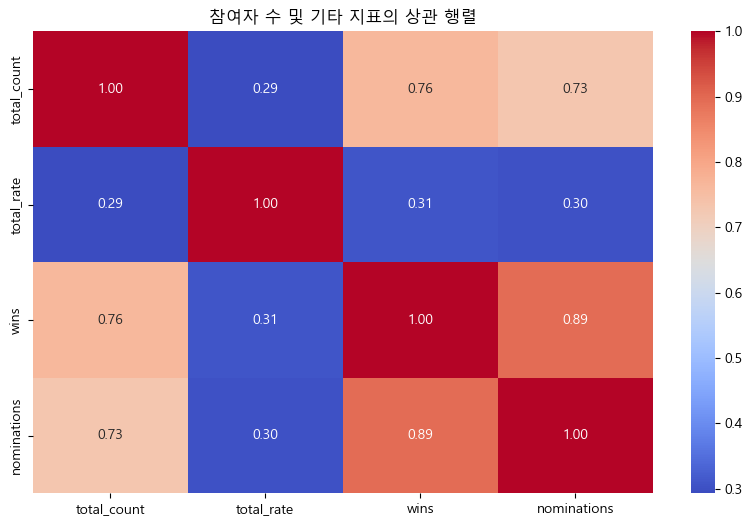

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt='.2f' )
plt.title('참여자 수 및 기타 지표의 상관 행렬')
plt.show()


### 참여자 수에 따른 분포 분석

Text(0.5, 1.0, 'Total_Count vs Total_Rated')

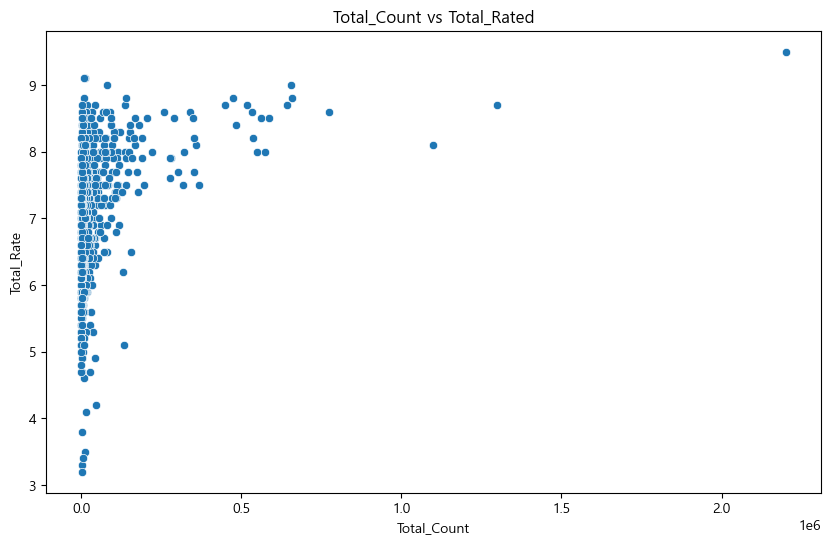

In [22]:
# 참여 수에 따른 드라마의 평점 분포나 수상/후보 수의 분포를 시각화
# 참여 수가 어느 정도 이상일 때 흥행 성공 가능성이 높은지 확인
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'total_count', y = 'total_rate', data=df)
plt.xlabel('Total_Count')
plt.ylabel('Total_Rate')
plt.title('Total_Count vs Total_Rated')

### 군집 분석(K-평균 군집화)


- 드라마 데이터를 K-평균 군집화하여 분석할 수 있다.
- 각 군집의 평균값을 통해 참여 수에 따른 드라마의 평점, 수상 및 후보 수의 관계를 확인할 수 있다.

In [20]:
from sklearn.cluster import KMeans

# K-평균 군집화를 위한 데이터 준비
# 필효한 피쳐들을 선택하고 결측값을 제거
culstering_features = df[['total_count', 'total_rate', 'wins', 'nominations']].dropna()

# 엘보우 방법을 사용하여 최적의 클러스터 수를 찾기 위해 SSE(Sum of Squared Errors)를 계산
sse = []
k_range = range(1, 11) # 클러스터 수를 1부터 10까지 변경하며 계산
for k  in k_range:
    kmeans = KMeans(n_clusters = k, random_state=41) #km모델 초기화
    kmeans.fit(culstering_features) 
    sse.append(kmeans.inertia_) # 각 클러스터 수에 대한 SSE 저장


c:\Users\dptmf\miniconda3\envs\conda_ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0.5, 1.0, '클러스터 수에 따른 SSE - 곡선이 급격히 꺾이는 지점을 최적의 클러스터 수로 선택')

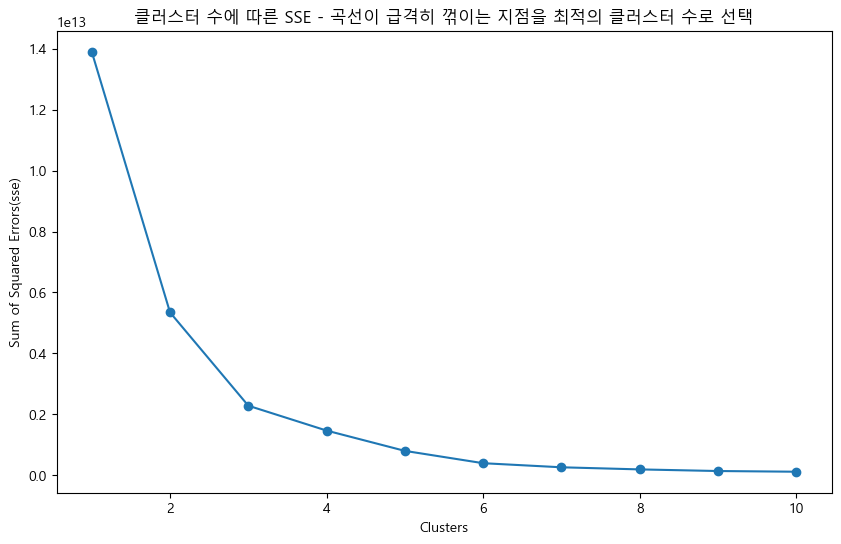

In [23]:
# 엘보우 그래프 그리기 (클러스터 수를 시각화)
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Errors(sse)')
plt.title('클러스터 수에 따른 SSE - 곡선이 급격히 꺾이는 지점을 최적의 클러스터 수로 선택')

In [ ]:
# K-평균 군집화 
#
#클러스터 수를 3으로 설정하고 k-평균 군집화 수행
kmeans = KMeans(n_clusters=3, random_state=42) # 설정 
culstering_features['cluster'] = kmeans.fit_predict(culstering_features) #수행 

# 각 군집별로 평균 흥행 지표를 계산
cluster_means = culstering_features.groupby('cluster').mean()

In [25]:
cluster_means

,total_count,total_rate,wins,nominations
cluster,,,,
0,4.443929e+05,8.278571,30.428571,96.428571
1,1.965233e+04,7.093021,2.443936,6.364989
2,1.533333e+06,8.766667,118.000000,265.000000


군집 0:

참여 수: 444,392  

총 평점: 8.28  

수상: 30.43  

후보: 96.43
  

군집 1:

참여 수: 19,652  

총 평점: 7.09  

수상: 2.44  

후보: 6.36  

  

군집 2:

참여 수: 1,533,333  

총 평점: 8.77  

수상: 118.00  

후보: 265.00  

  
  
이 결과는 참여 수가 많을수록 평점, 수상, 후보 수가 모두 높아지는 경향을 보여줍니다.  
 특히 군집 2는 매우 높은 참여 수와 함께 다른 모든 흥행 지표에서도 높은 값을 보입니다.

## 모델 학습 및 평가

### X,y 정의 및 데이터 분할 

In [14]:
# 타겟 변수 정의
# X(독립 변수- 타겟) = 인코딩한 후의 데이터프레임 // y(종속 변수-피쳐)= 절대 지표(흥행 가능성 점수)
X = df_encoded
y = absolute_metrics['adjusted_absolute_index'].loc[df_encoded.index]

# 데이터 분할 (train, teat) / random_state 재현성 보장 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


- **평균 제곱 오차 (MSE)**: 예측값과 실제값 사이의 차이를 제곱하여 평균을 낸 값입니다. 값이 작을수록 예측이 실제와 가깝다는 것을 의미합니다.
- **결정 계수 (R²)**: 모델의 설명력을 나타내는 지표로, 0과 1 사이의 값을 가집니다. 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 의미입니다.

### 피쳐 중요도 분석 (랜덤 포레스트를 사용)

In [18]:
# 피처 중요도 분석 (랜덤 포레스트를 사용한 추가 분석)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
featur_importances = rf_model.feature_importances_

In [19]:
# 피쳐 중요도 출력 
feature_names = X.columns
featur_importance_df = pd.DataFrame({'feature' : feature_names, 'importance': featur_importances})
featur_importance_df = featur_importance_df.sort_values(by='importance', ascending=False)

In [20]:
featur_importance_df

,feature,importance
3,nominations,0.541434
0,total_rate,0.235874
1,total_count,0.205972
2,wins,0.011707
4,runtime,0.002182
5,total_season_num,0.001104
20,코미디,0.000264
12,범죄,0.000196
9,공포,0.000192
16,액션,0.000170


### 회귀 모델

In [15]:
# 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
# 결과 출력
print(f'평균 제곱 오차 (MSE): {mse}')
print(f'결정 계수 (R²): {r2}')

평균 제곱 오차 (MSE): 4.648861832185654
결정 계수 (R²): 0.7524617684697396


### 회귀 모델 하이퍼 파라미터 튜닝

In [24]:
# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [25]:
# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5,
                            n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [27]:
# 최적의 모델 학습 및 평가
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [28]:
print(f'평균 제곱 오차 (MSE): {mse}')
print(f'결정 계수 (R²): {r2}')
print(f'최적 하이퍼파라미터: {grid_search.best_params_}')

평균 제곱 오차 (MSE): 0.19332596685082876
결정 계수 (R²): 0.9897059603682322
최적 하이퍼파라미터: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## 다양한 모델 사용 및 비교 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 데이터 로드
df = pd.read_excel('imdb_final_6.xlsx', sheet_name='Sheet1')

# 절대 지표 계산 함수
def calculate_adjusted_absolute_index(row):
    if row['total_rate'] >= 8:
        rate_points = 10
    elif row['total_rate'] >= 7:
        rate_points = 8
    elif row['total_rate'] >= 6:
        rate_points = 6
    else:
        rate_points = 4
    
    if row['total_count'] >= 50000:
        count_points = 10
    elif row['total_count'] >= 10000:
        count_points = 8
    elif row['total_count'] >= 1000:
        count_points = 6
    else:
        count_points = 4
    
    total_awards = row['wins'] + row['nominations']
    if total_awards >= 50:
        awards_points = 10
    elif total_awards >= 20:
        awards_points = 8
    elif total_awards >= 10:
        awards_points = 6
    else:
        awards_points = 4
    
    adjusted_absolute_index = rate_points + count_points + awards_points
    
    return adjusted_absolute_index

# 절대 지표를 데이터프레임에 추가
df['adjusted_absolute_index'] = df.apply(calculate_adjusted_absolute_index, axis=1)

# 피처와 타겟 변수 정의
numeric_features = ['total_rate', 'total_count', 'wins', 'nominations', 'runtime', 'total_season_num']
categorical_features = ['genre']

df_selected = df[numeric_features + categorical_features].dropna()

# 파이프라인 설정
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 파이프라인을 사용하여 데이터 전처리 및 모델 학습
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

X = df_selected[numeric_features + categorical_features]
y = df['adjusted_absolute_index'].loc[X.index]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측 및 평가
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'평균 제곱 오차 (MSE): {mse}')
print(f'결정 계수 (R²): {r2}')


평균 제곱 오차 (MSE): 0.19114917127071807
결정 계수 (R²): 0.9898218683361939


In [38]:
# 하이퍼파라미터 그리드 설정
param_distributions = {
    'model__n_estimators': [50, 100, 200],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# 랜덤 서치를 사용한 하이퍼파라미터 튜닝
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# 최적의 모델로 예측 및 평가
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'평균 제곱 오차 (MSE): {mse}')
print(f'결정 계수 (R²): {r2}')
print(f'최적 하이퍼파라미터: {random_search.best_params_}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
평균 제곱 오차 (MSE): 0.18588648707494068
결정 계수 (R²): 0.9901020908048218
최적 하이퍼파라미터: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 10, 'model__bootstrap': True}


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# 여러 모델 초기화
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# 모델 비교
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f'{name} 평균 결정 계수 (R²): {scores.mean()}')


RandomForest 평균 결정 계수 (R²): 0.9643355741290043
GradientBoosting 평균 결정 계수 (R²): 0.9767416228496545
XGBoost 평균 결정 계수 (R²): 0.9684426047039574
